## J-Quants APIを使ってみる
- [J-Quants](https://jpx-jquants.com/dashboard/menu/?lang=ja)
- [jquants-api-client](https://github.com/J-Quants/jquants-api-client-python)
- [API仕様書](https://jpx.gitbook.io/j-quants-ja/api-reference)

In [1]:
import os
import time
from datetime import datetime

import jquantsapi
import pandas as pd
import requests
from dateutil import tz

REFRESH_TOKEN: str = os.environ.get("JQ_REFRESH_TOKEN")
my_mail_address: str = os.environ.get("JQ_MAIL_ADDRESS")
my_password: str = os.environ.get("JQ_PASSWORD")
cli = jquantsapi.Client(mail_address=my_mail_address, password=my_password)
df = cli.get_price_range(
    start_dt=datetime(2022, 7, 25, tzinfo=tz.gettz("Asia/Tokyo")),
    end_dt=datetime(2022, 7, 26, tzinfo=tz.gettz("Asia/Tokyo")),
)
print(df)

           Date   Code    Open    High     Low   Close UpperLimit LowerLimit  \
0    2022-07-25  13010  3615.0  3660.0  3615.0  3630.0          0          0   
0    2022-07-26  13010  3615.0  3640.0  3610.0  3635.0          0          0   
1    2022-07-25  13050  2026.5  2037.0  2022.0  2023.0          0          0   
1    2022-07-26  13050  2026.0  2029.5  2022.0  2023.5          0          0   
2    2022-07-25  13060  2002.5  2015.0  2000.0  2001.0          0          0   
...         ...    ...     ...     ...     ...     ...        ...        ...   
4191 2022-07-26  99950   403.0   404.0   402.0   404.0          0          0   
4192 2022-07-25  99960  1274.0  1274.0  1263.0  1267.0          0          0   
4192 2022-07-26  99960  1254.0  1266.0  1254.0  1255.0          0          0   
4193 2022-07-25  99970   829.0   831.0   816.0   826.0          0          0   
4193 2022-07-26  99970   826.0   827.0   816.0   825.0          0          0   

        Volume  TurnoverValue  Adjustme

## 上場銘柄一覧(/listed/info)
- [J-Quants API - listed info](https://jpx.gitbook.io/j-quants-ja/api-reference/listed_info)

In [2]:
def get_listed_companies(idToken: str):
    """上場銘柄一覧を習得する

    Args:
        idToken (str): idToken

    Returns:
        listed_companies (pd.DataFrame): 上場銘柄が記録されたデータフレーム
    """
    r = requests.get(
        "https://api.jquants.com/v1/listed/info",
        headers={"Authorization": "Bearer {}".format(idToken)},
    )
    if r.status_code == requests.codes.ok:
        listed_companies = pd.DataFrame(r.json()["info"]).set_index("Code")
        return listed_companies
    else:
        return None

In [3]:
r_post = requests.post(
    f"https://api.jquants.com/v1/token/auth_refresh?refreshtoken={REFRESH_TOKEN}"
)
idToken = r_post.json()["idToken"]

listed_companies = get_listed_companies(idToken)
listed_companies.head()

,Date,CompanyName,CompanyNameEnglish,Sector17Code,Sector17CodeName,Sector33Code,Sector33CodeName,ScaleCategory,MarketCode,MarketCodeName
Code,,,,,,,,,,
13010,2023-12-06,極洋,"KYOKUYO CO.,LTD.",1,食品,0050,水産・農林業,TOPIX Small 2,0111,プライム
13050,2023-12-06,大和アセットマネジメント株式会社 ｉＦｒｅｅＥＴＦ ＴＯＰＩＸ（年１回決算型）,iFreeETF TOPIX (Yearly Dividend Type),99,その他,9999,その他,-,0109,その他
13060,2023-12-06,野村アセットマネジメント株式会社 ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,NEXT FUNDS TOPIX Exchange Traded Fund,99,その他,9999,その他,-,0109,その他
13080,2023-12-06,日興アセットマネジメント株式会社 上場インデックスファンドＴＯＰＩＸ,Nikko Exchange Traded Index Fund TOPIX,99,その他,9999,その他,-,0109,その他
13090,2023-12-06,野村アセットマネジメント株式会社 ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０...,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,99,その他,9999,その他,-,0109,その他


In [4]:
paint_companies = listed_companies[
    listed_companies["CompanyName"].str.contains("塗料|ペイント")
]
paint_companies

,Date,CompanyName,CompanyNameEnglish,Sector17Code,Sector17CodeName,Sector33Code,Sector33CodeName,ScaleCategory,MarketCode,MarketCodeName
Code,,,,,,,,,,
46110,2023-12-06,大日本塗料,"Dai Nippon Toryo Company,Limited",4,素材・化学,3200,化学,TOPIX Small 2,0111,プライム
46120,2023-12-06,日本ペイントホールディングス,"NIPPON PAINT HOLDINGS CO.,LTD.",4,素材・化学,3200,化学,TOPIX Mid400,0111,プライム
46130,2023-12-06,関西ペイント,"KANSAI PAINT CO.,LTD.",4,素材・化学,3200,化学,TOPIX Mid400,0111,プライム
46150,2023-12-06,神東塗料,"SHINTO PAINT COMPANY,LIMITED",4,素材・化学,3200,化学,TOPIX Small 2,0112,スタンダード
46160,2023-12-06,川上塗料,"KAWAKAMI PAINT MANUFACTURING CO.,LTD.",4,素材・化学,3200,化学,-,0112,スタンダード
46170,2023-12-06,中国塗料,"Chugoku Marine Paints,Ltd.",4,素材・化学,3200,化学,TOPIX Small 1,0111,プライム
46190,2023-12-06,日本特殊塗料,"Nihon Tokushu Toryo Co.,Ltd.",4,素材・化学,3200,化学,TOPIX Small 2,0112,スタンダード
46210,2023-12-06,ロックペイント,"ROCK PAINT CO.,LTD.",4,素材・化学,3200,化学,-,0112,スタンダード
46240,2023-12-06,イサム塗料,"Isamu Paint Co.,Ltd.",4,素材・化学,3200,化学,-,0112,スタンダード


## セクターの分布
- [東証業種別株価指数・TOPIX-17シリーズ](https://www.jpx.co.jp/markets/indices/line-up/files/fac_13_sector.pdf)
- [matplotlib.pyplot.pie — Matplotlib 3.8.3 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

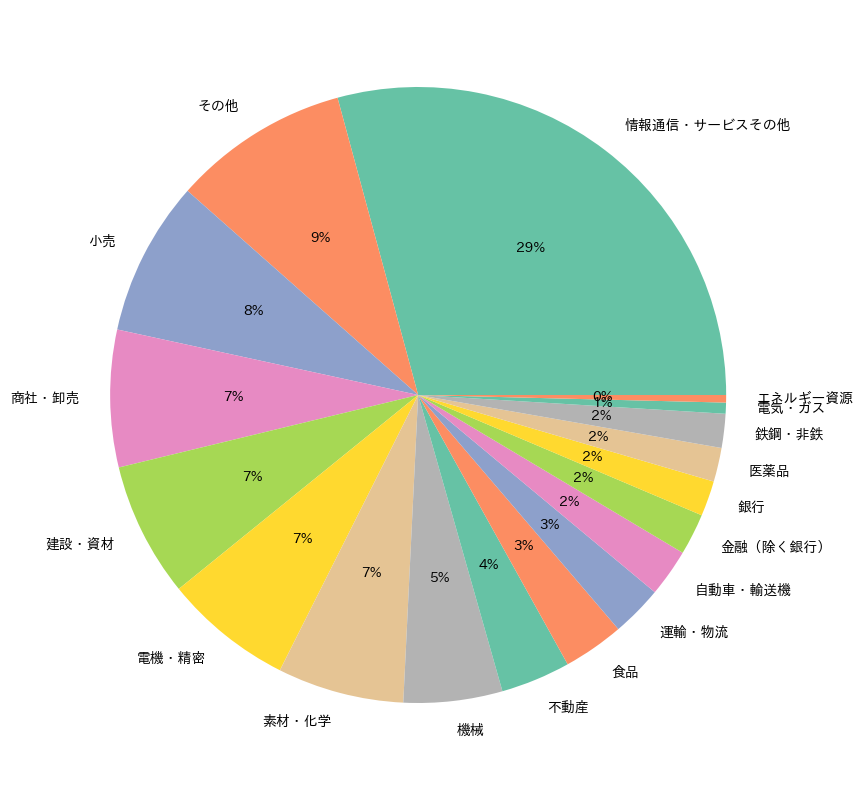

In [5]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sector17_distribution = listed_companies["Sector17CodeName"].value_counts()
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 10))
plt.pie(
    sector17_distribution,
    labels=sector17_distribution.index,
    colors=colors,
    autopct="%.0f%%",
)
plt.show()

## 規模コード
- [東証規模別株価指数](https://www.jpx.co.jp/markets/indices/line-up/files/fac_12_size.pdf)
- [上場銘柄一覧(/listed/info)](https://jpx.gitbook.io/j-quants-ja/api-reference/listed_info)

In [6]:
import plotly.express as px

midcap_categories = ["TOPIX Mid400", "TOPIX Large70", "TOPIX Core30"]

df = px.data.tips()
fig = px.treemap(
    listed_companies[listed_companies["ScaleCategory"].isin(midcap_categories)],
    path=["Sector17CodeName", "Sector33CodeName"],
)
fig.show()

df = px.data.tips()
fig = px.treemap(
    listed_companies[listed_companies["ScaleCategory"].isin(midcap_categories)],
    path=["Sector17CodeName", "Sector33CodeName", "ScaleCategory"],
)
fig.show()

## 財務情報の取得
- [財務情報(/fins/statements)](https://jpx.gitbook.io/j-quants-ja/api-reference/statements)
- [Ⅰ．インターフェイス仕様](https://www.jpx.co.jp/markets/paid-info-equities/listing/co3pgt0000005o97-att/tdnetapi_specifications.pdf)

In [7]:
def get_statements(idToken, code):
    time.sleep(0.5)
    r = requests.get(
        f"https://api.jquants.com/v1/fins/statements?code={code}",
        headers={"Authorization": "Bearer {}".format(idToken)},
    )
    if r.status_code == requests.codes.ok:
        return r.json()["statements"]
    else:
        return None

In [8]:
res = get_statements(idToken, 86970)
res

[{'DisclosedDate': '2022-01-27',
  'DisclosedTime': '12:00:00',
  'LocalCode': '86970',
  'DisclosureNumber': '20220126573026',
  'TypeOfDocument': '3QFinancialStatements_Consolidated_IFRS',
  'TypeOfCurrentPeriod': '3Q',
  'CurrentPeriodStartDate': '2021-04-01',
  'CurrentPeriodEndDate': '2021-12-31',
  'CurrentFiscalYearStartDate': '2021-04-01',
  'CurrentFiscalYearEndDate': '2022-03-31',
  'NextFiscalYearStartDate': '',
  'NextFiscalYearEndDate': '',
  'NetSales': '100586000000',
  'OperatingProfit': '55967000000',
  'OrdinaryProfit': '',
  'Profit': '38013000000',
  'EarningsPerShare': '71.71',
  'DilutedEarningsPerShare': '',
  'TotalAssets': '62076519000000',
  'Equity': '311381000000',
  'EquityToAssetRatio': '0.005',
  'BookValuePerShare': '',
  'CashFlowsFromOperatingActivities': '',
  'CashFlowsFromInvestingActivities': '',
  'CashFlowsFromFinancingActivities': '',
  'CashAndEquivalents': '73158000000',
  'ResultDividendPerShare1stQuarter': '',
  'ResultDividendPerShare2ndQua

In [9]:
paint_companies_statements = pd.concat(
    [pd.DataFrame(get_statements(idToken, code)) for code in paint_companies.index]
)

for c in paint_companies_statements.filter(
    regex="Sales|Assets|CashFlows|Profit|Equity|EarningsPerShare"
).columns:
    paint_companies_statements[c] = pd.to_numeric(paint_companies_statements[c])

for c in paint_companies_statements.filter(regex="Date").columns:
    paint_companies_statements[c] = pd.to_datetime(paint_companies_statements[c])

In [11]:
sorted_data = paint_companies_statements.groupby(["LocalCode"]).apply(
    lambda x: x.sort_values(["DisclosureNumber"], ascending=False)
)
sorted_data["決算期"] = sorted_data.apply(
    lambda row: f"{row['DisclosedDate'].year}-{row['TypeOfCurrentPeriod']}", axis=1
)
sorted_data["会社名"] = [
    paint_companies.at[code, "CompanyName"] for code in sorted_data["LocalCode"]
]
sorted_data

DisclosedDate DisclosedTime LocalCode DisclosureNumber  \
LocalCode                                                            
46110     8    2023-11-09      14:00:00     46110   20231020569248   
          7    2023-08-08      14:00:00     46110   20230721525034   
          6    2023-05-11      14:00:00     46110   20230421551091   
          5    2023-02-09      14:00:00     46110   20230123592325   
          4    2022-10-27      14:00:00     46110   20221024548184   
...                   ...           ...       ...              ...   
46240     4    2023-02-09      13:00:00     46240   20230123592504   
          3    2022-11-07      13:00:00     46240   20221024547981   
          2    2022-08-05      13:00:00     46240   20220722503491   
          1    2022-05-10      13:00:00     46240   20220426528461   
          0    2022-02-09      13:00:00     46240   20220124571237   

                                    TypeOfDocument TypeOfCurrentPeriod  \
LocalCode                                                                
46110     8  2QFinancialStatements_Consolidated_JP                  2Q   
          7  1QFinancialStatements_Consolidated_JP                  1Q   
          6  FYFinancialStatements_Consolidated_JP                  FY   
          5  3QFinancialStatements_Consolidated_JP                  3Q   
          4                   EarnForecastRevision                  2Q   
...                                            ...                 ...   
46240     4  3QFinancialStatements_Consolidated_JP                  3Q   
          3  2QFinancialStatements_Consolidated_JP                  2Q   
          2  1QFinancialStatements_Consolidated_JP                  1Q   
          1  FYFinancialStatements_Consolidated_JP                  FY   
          0  3QFinancialStatements_Consolidated_JP                  3Q   

            CurrentPeriodStartDate CurrentPeriodEndDate  \
LocalCode                                                 
46110     8             2023-04-01           2023-09-30   
          7             2023-04-01           2023-06-30   
          6             2022-04-01           2023-03-31   
          5             2022-04-01           2022-12-31   
          4             2022-04-01           2022-09-30   
...                            ...                  ...   
46240     4             2022-04-01           2022-12-31   
          3             2022-04-01           2022-09-30   
          2             2022-04-01           2022-06-30   
          1             2021-04-01           2022-03-31   
          0             2021-04-01           2021-12-31   

            CurrentFiscalYearStartDate CurrentFiscalYearEndDate  ...  \
LocalCode                                                        ...   
46110     8                 2023-04-01               2024-03-31  ...   
          7                 2023-04-01               2024-03-31  ...   
          6                 2022-04-01               2023-03-31  ...   
          5                 2022-04-01               2023-03-31  ...   
          4                 2022-04-01               2023-03-31  ...   
...                                ...                      ...  ...   
46240     4                 2022-04-01               2023-03-31  ...   
          3                 2022-04-01               2023-03-31  ...   
          2                 2022-04-01               2023-03-31  ...   
          1                 2021-04-01               2022-03-31  ...   
          0                 2021-04-01               2022-03-31  ...   

            ForecastNonConsolidatedOrdinaryProfit  \
LocalCode                                           
46110     8                                   NaN   
          7                                   NaN   
          6                                   NaN   
          5                                   NaN   
          4                                   NaN   
...                                           ...   
46240    

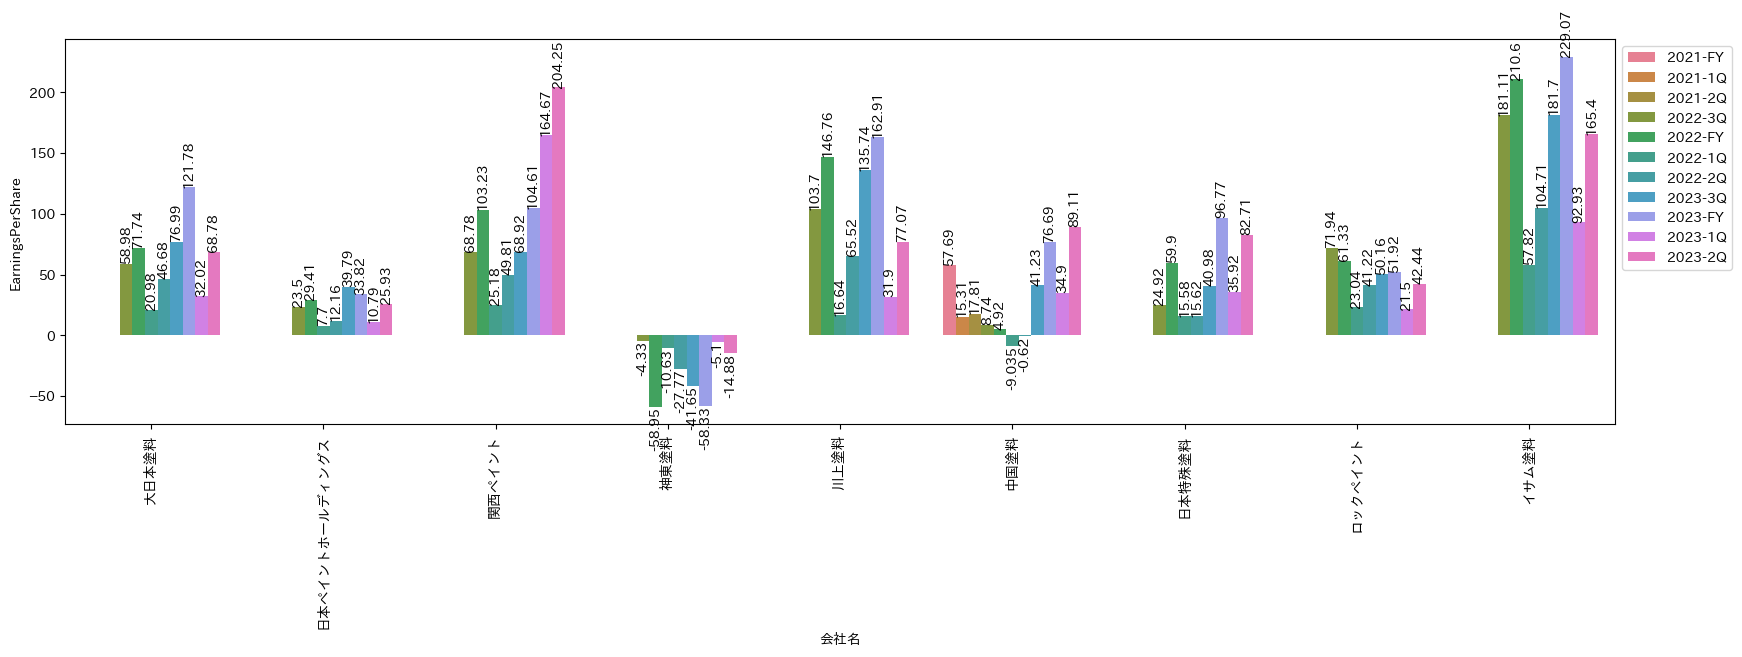

In [12]:
plt.figure(figsize=(20, 5))
hue_order = [
    "2021-FY",
    "2021-1Q",
    "2021-2Q",
    "2022-3Q",
    "2022-FY",
    "2022-1Q",
    "2022-2Q",
    "2023-3Q",
    "2023-FY",
    "2023-1Q",
    "2023-2Q",
]
ax = sns.barplot(
    data=sorted_data,
    x="会社名",
    y="EarningsPerShare",
    hue="決算期",
    hue_order=hue_order,
)
for c in ax.containers:
    ax.bar_label(c, rotation=90, fontsize=10)

plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()